# Congress Data EDA 

The purpose of this EDA analysis is to generate a summary of the parsed congress speach text generated through the developed code repo! This process opens the JSON file outpu generated for a particular date, reads the inputs as a data frame, transforms the data by cleaning up and removing a set of stop words, and then generates statistics around the number of pages in a given congress speach date, number of speakers, along with character, and word counts. The input to this analysis is a set of input dates on which to perform the analysis. These results are then compared with the stanford data, to compare the results.

## Importing libraries, and reading data

In [73]:
# Importing required packages

import json
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint

In [74]:
# defining input file location
# this is hard coded, but can be changed to programatically scroll through the entire directory
input_file_path = '/Users/jaysunda/Sundar/Personal/IU-DS/Final-Project/src/json_output/Cleaned-CREC-'
input_date = '2021-06-08'
json_input_file_path = input_file_path + input_date + '.json'
# json_input_file_path = '/Users/jaysunda/Sundar/Personal/IU-DS/Final-Project/src/json_output/Cleaned-CREC-2021-06-08.json'

In [75]:
# Read the json data as a sample dataframe
df = pd.read_json(json_input_file_path)
df['processed_date'] = input_date

In [76]:
df_rows, df_columns = df.shape
print("The imported dataframe has {} rows, across {} columns".format(df_rows, df_columns))

The imported dataframe has 63 rows, across 11 columns


In [77]:
# Describe the base dataframe to check datatypes, and char frequencies
df.describe()

,CR_Section,title,url,Pages,raw_text,cleaned_text,Speakers,Speaker Affiliation,Speaker Role,citation,processed_date
count,63,63,63,63,63,63,63,63,63,63,63
unique,2,57,63,39,63,62,42,2,1,25,1
top,Senate,LEGISLATIVE SESSION,https://www.govinfo.gov/content/pkg/CREC-2021-...,S3997 - S3997,"\n[Congressional Record Volume 167, Number 99 ...",LEGISLATIVE SESSION\n\n\tMr. SCHUMER. Madam Pr...,[Charles E. Schumer],United States Senate,speaking,167 Cong. Rec. S3997,2021-06-08
freq,42,3,1,8,1,2,14,42,63,8,63


## Set up a dictionary to cleanup given set of words/special characters

In [78]:
# Define a dictionary of string series to replace with a replace character. This can be expanded and other 
# The key is the character to replace, and the value is the character to replace the string with.

cleanup_dict = {"\\n" : " ", 
                "\\t" : " "}

In [79]:
# Loop through the Cleanup process, to remove special characters

for key in cleanup_dict:
    print("Processing to remove stop word from the dataframe. Removing: ", key)
    
    df['cleaned_text'] = df['cleaned_text'].str.replace(key,cleanup_dict[key])

Processing to remove stop word from the dataframe. Removing:  \n
Processing to remove stop word from the dataframe. Removing:  \t


In [80]:
df.describe()

,CR_Section,title,url,Pages,raw_text,cleaned_text,Speakers,Speaker Affiliation,Speaker Role,citation,processed_date
count,63,63,63,63,63,63,63,63,63,63,63
unique,2,57,63,39,63,62,42,2,1,25,1
top,Senate,LEGISLATIVE SESSION,https://www.govinfo.gov/content/pkg/CREC-2021-...,S3997 - S3997,"\n[Congressional Record Volume 167, Number 99 ...",LEGISLATIVE SESSION Mr. SCHUMER. Madam Presi...,[Charles E. Schumer],United States Senate,speaking,167 Cong. Rec. S3997,2021-06-08
freq,42,3,1,8,1,2,14,42,63,8,63


## Generate speakers in each session

In [14]:
# Get Speakers, and Number of Speakers in each page
for index, row in df.iterrows():
    print(row['Pages'], row['Speakers'], len(row['Speakers']))

E613 - E613 ['Maria Elvira Salazar'] 1
E613 - E613 ['Gregorio Kilili Camacho Sablan'] 1
E613 - E613 ['Cynthia Axne'] 1
E613 - E614 ['Joaquin Castro'] 1
E614 - E614 ['Carolyn B. Maloney'] 1
E614 - E614 ['Blaine Luetkemeyer'] 1
E614 - E615 ['Sam Graves'] 1
E615 - E615 ['Eleanor Holmes Norton'] 1
E615 - E615 ['Debbie Dingell'] 1
E615 - E615 ['Rodney Davis'] 1
E615 - E616 ['Marcy Kaptur'] 1
E616 - E616 ['Ted Lieu'] 1
E616 - E616 ['Blaine Luetkemeyer'] 1
E616 - E616 ['Ann M. Kuster'] 1
E616 - E617 ['Mike Gallagher'] 1
E617 - E617 ['Gregorio Kilili Camacho Sablan'] 1
E617 - E618 ['Sam Graves'] 1
E618 - E618 ['Michael R. Turner'] 1
E618 - E618 ['Eleanor Holmes Norton'] 1
E618 - E618 ['Richard E. Neal'] 1
E618 - E619 ['Kevin Brady'] 1
S3967 - S3967 ['Charles E. Schumer'] 1
S3967 - S3968 ['Charles E. Schumer'] 1
S3968 - S3968 ['Mitch McConnell', 'Charles E. Schumer'] 2
S3968 - S3969 ['Mitch McConnell', 'Richard J. Durbin'] 2
S3969 - S3970 ['Richard J. Durbin', 'John Thune'] 2
S3970 - S3971 ['Mi

## Function to count characters and words

In [15]:
# Function to get the number of characters in each input string
def char_count(input_text):
    counter=0
    for i in input_text:
#         print(i)
        counter+=1
    return counter

# Function to get the number of words in each input string
def word_count(input_text):
#     print(input_text.split())
    counter=len(input_text.split())
    return counter

## Build summary statistics

In [82]:
# Creating an empty datafarme to collect speakers and character count in each page
pages_df = pd.DataFrame(columns=['Pages', '#_Speakers', '#_char_count', '#_word_count'])
pages_df

,Pages,#_Speakers,#_char_count,#_word_count


In [83]:
# This loops through each row in the base dataframe to collect statistics
for index, row in df.iterrows():
    pages_df.loc[index] = [row['Pages'], len(row['Speakers']), char_count(row['cleaned_text']), word_count(row['cleaned_text'])]

print(pages_df)

            Pages #_Speakers #_char_count #_word_count
0     E613 - E613          1         2910          438
1     E613 - E613          1         2348          335
2     E613 - E613          1         2844          441
3     E613 - E614          1         1944          280
4     E614 - E614          1         6267          932
..            ...        ...          ...          ...
58  S3997 - S3997          1         1131          167
59  S3997 - S3997          1         1209          175
60  S3997 - S3997          1          569           80
61  S3997 - S3997          1          672          101
62  S3997 - S3997          1          358           51

[63 rows x 4 columns]


In [84]:
# generate a list of random characters to test the data for different dates
list(randint(10, size=2))

[6, 5]

## Plot showing number of speakers in each congress page

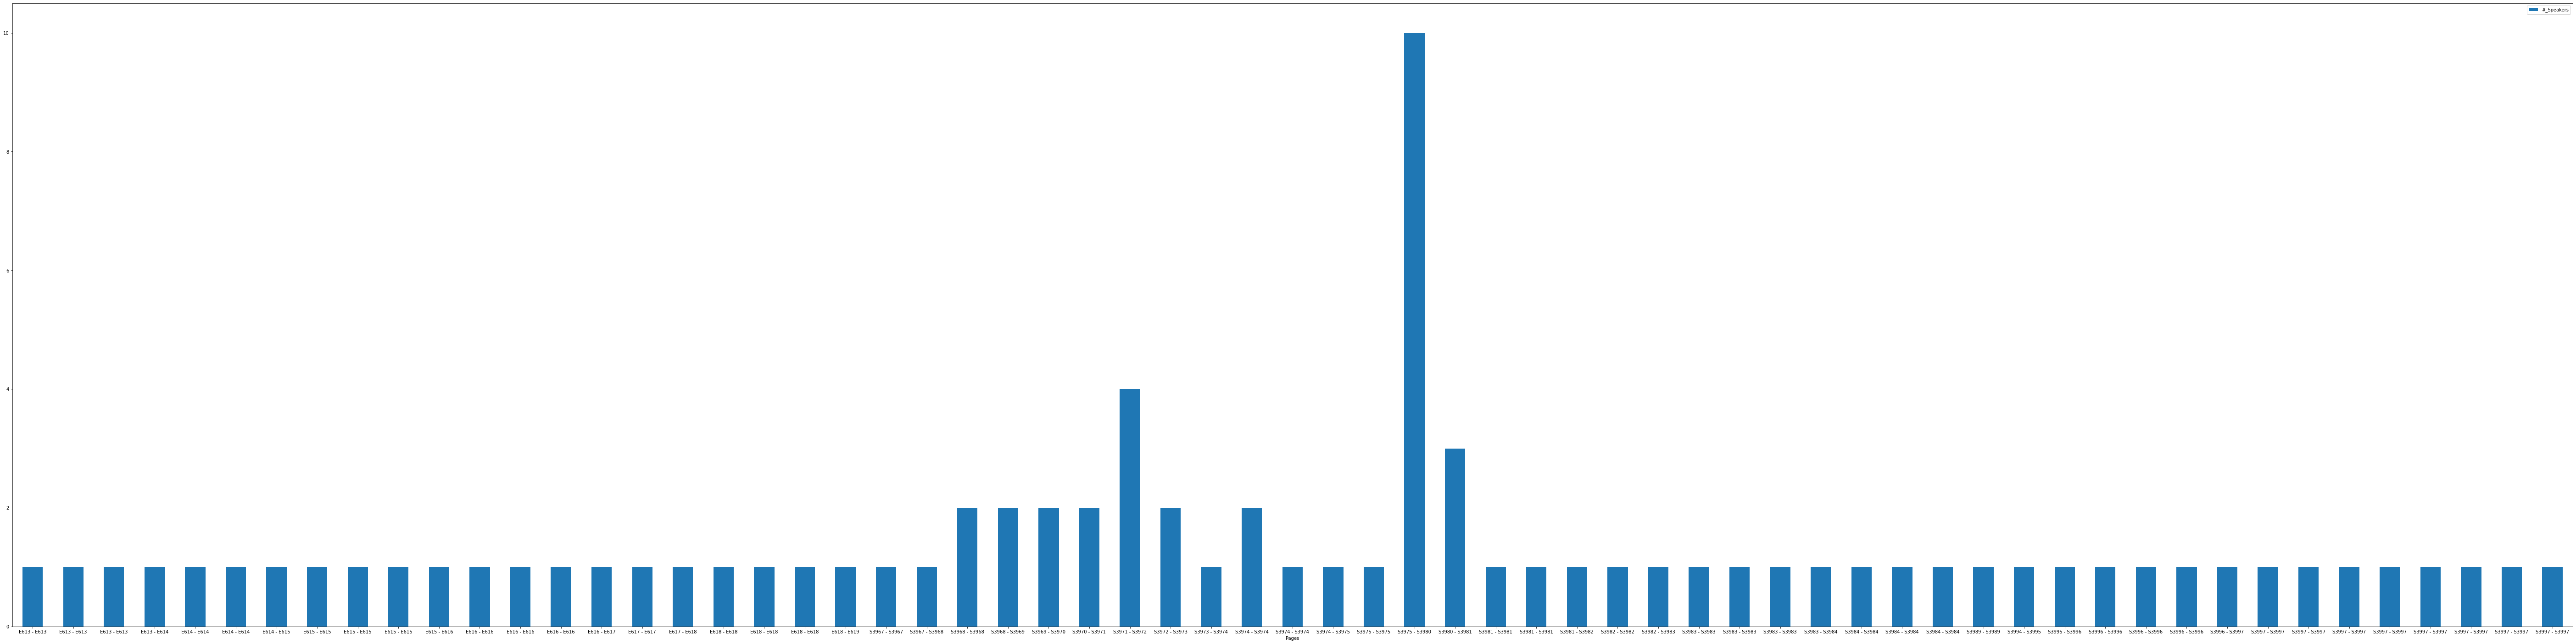

In [85]:

pages_df.plot.bar(x='Pages', y='#_Speakers', rot=0)

## Speakers in each page

Text(0.5, 1.0, '# of Speakers by Each Page')

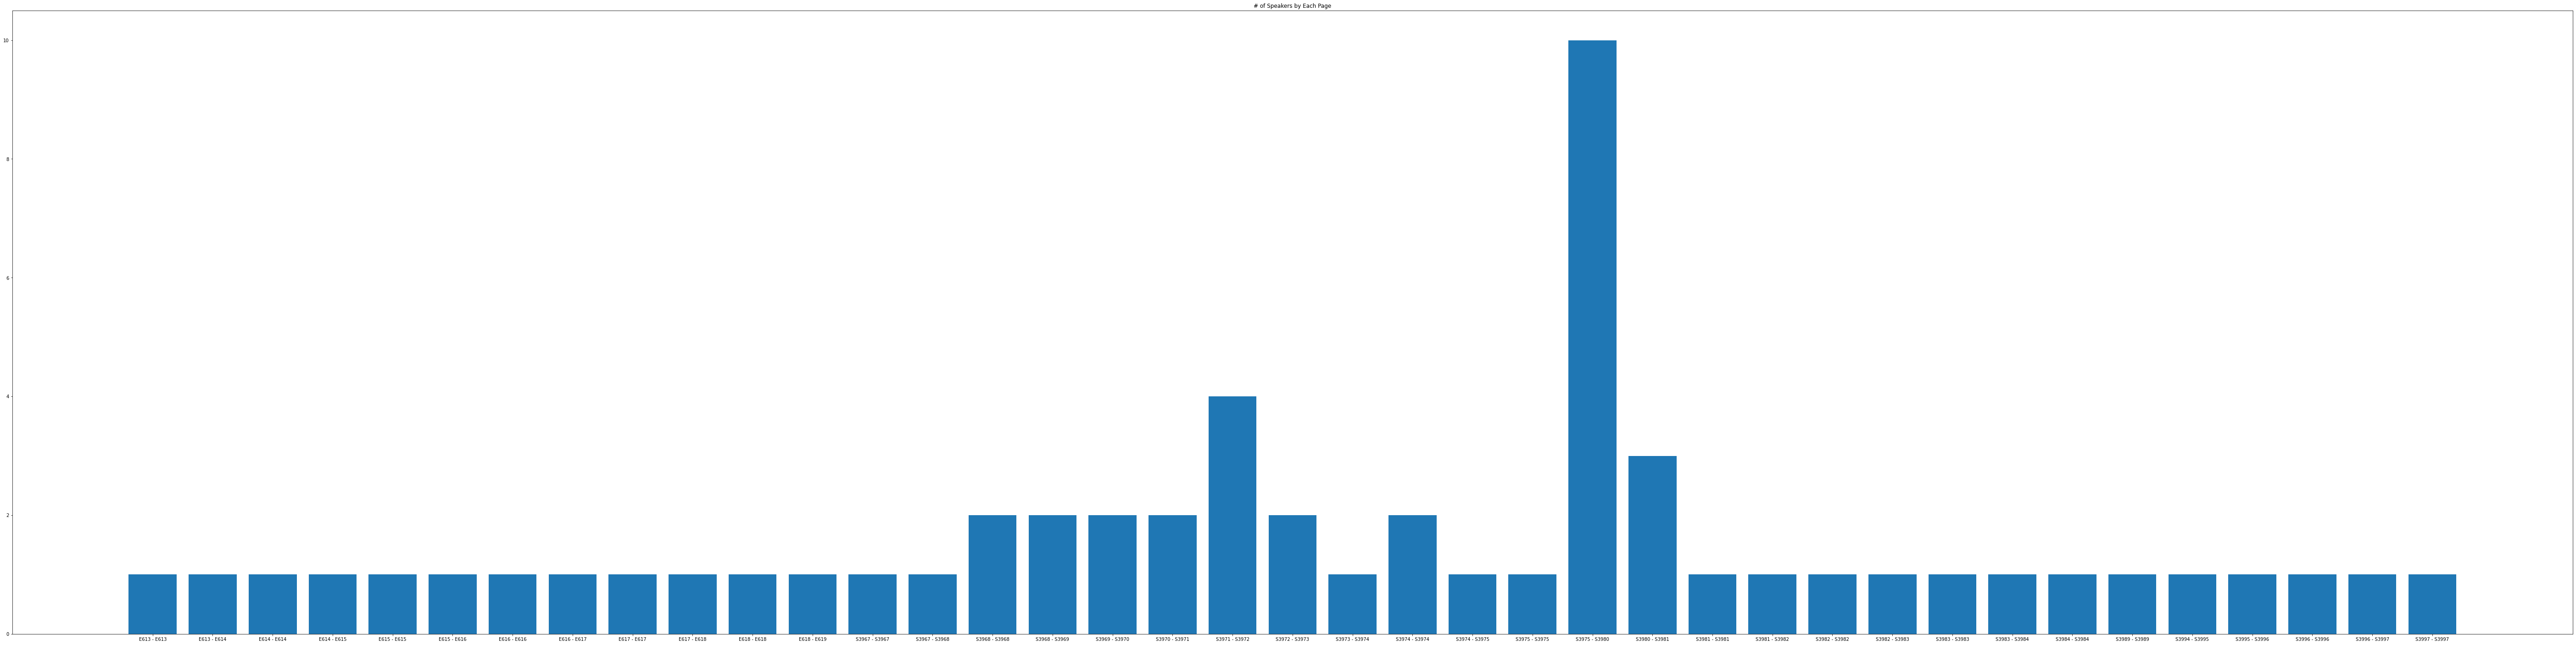

In [86]:
plt.rcParams["figure.figsize"] = (100, 25)
plt.bar(pages_df['Pages'],pages_df['#_Speakers'], align='center')
plt.title('# of Speakers by Each Page')

## Plot showing number of words in each page

Text(0.5, 1.0, '# of Words by Each Page')

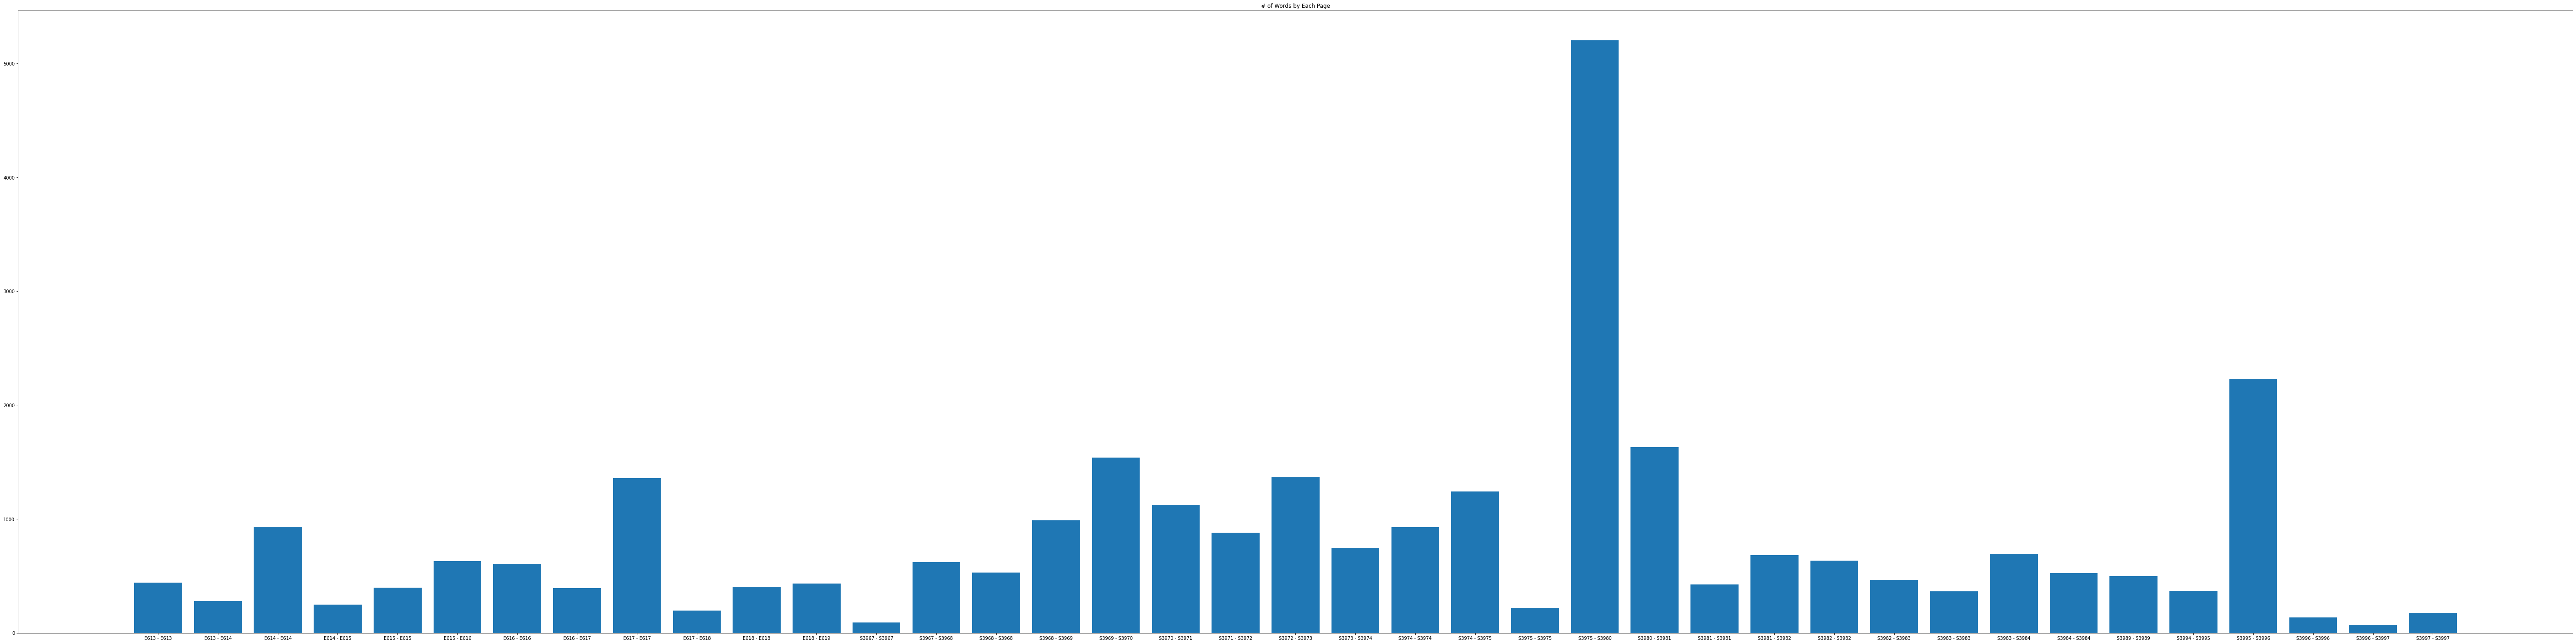

In [87]:
plt.bar(pages_df['Pages'],pages_df['#_word_count'], align='center')
plt.title('# of Words by Each Page')

## Summary table with details of number of speakers, character count, and word count

In [88]:

print("This table shows a summary stats of number of speaker, and char/word count by page")

(pages_df.sort_values(by = '#_Speakers', ascending = False))

This table shows a summary stats of number of speaker, and char/word count by page


,Pages,#_Speakers,#_char_count,#_word_count
34,S3975 - S3980,10,35103,5205
27,S3971 - S3972,4,6148,878
35,S3980 - S3981,3,9671,1630
30,S3974 - S3974,2,5646,930
28,S3972 - S3973,2,8329,1367
...,...,...,...,...
21,S3967 - S3967,1,553,90
22,S3967 - S3968,1,3813,624
29,S3973 - S3974,1,4664,749
1,E613 - E613,1,2348,335


## Summary table of total number of speakers, and words in the given document

In [89]:
print("Number of Speakers in the session are: {}".format(pages_df['#_Speakers'].sum()))
print("Number of words in the session are: {}".format(pages_df['#_word_count'].sum()))

Number of Speakers in the session are: 83
Number of words in the session are: 34760


## Save the output in a csv file

In [90]:
df.to_csv("Summarized CREC Data.csv")

## Procedure to generate summary statistics for multiple dates

In [91]:
# Function to get the number of characters in each input string
def char_count(input_text):
    counter=0
    for i in input_text:
#         print(i)
        counter+=1
    return counter

# Function to get the number of words in each input string
def word_count(input_text):
#     print(input_text.split())
    counter=len(input_text.split())
    return counter

def get_data_statistics(input_dates):
    
#     input_dates = ['2021-06-07', '2021-06-08']
    
    # Creating an empty datafarme to collect speakers and character count in each page
    summary_df = pd.DataFrame(columns=['Date_Parsed', '#_Speakers', '#_word_count'])
    summary_index=0
    
    for iter_date in input_dates:
        # defining input file location
        # this is hard coded, but can be changed to programatically scroll through the entire directory
        input_file_path = '/Users/jaysunda/Sundar/Personal/IU-DS/Final-Project/src/json_output/Cleaned-CREC-'
        json_input_file_path = input_file_path + iter_date + '.json'
        
        df = pd.read_json(json_input_file_path)
        df['processed_date'] = iter_date
        
        df_rows, df_columns = df.shape
#         print(df.shape)
    
        cleanup_dict = {"\\n" : " ", 
                "\\t" : " "}
        
        for key in cleanup_dict:
            df['cleaned_text'] = df['cleaned_text'].str.replace(key,cleanup_dict[key])
            
        # Creating an empty datafarme to collect speakers and character count in each page
        pages_df = pd.DataFrame(columns=['Pages', '#_Speakers', '#_char_count', '#_word_count'])
        
        # This loops through each row in the base dataframe to collect statistics
        for index, row in df.iterrows():
            pages_df.loc[index] = [row['Pages'], len(row['Speakers']), char_count(row['cleaned_text']), word_count(row['cleaned_text'])]
            
        summary_df.loc[summary_index] = [iter_date, pages_df['#_Speakers'].sum(), pages_df['#_word_count'].sum()]
        summary_index+=1

    print(summary_df)


## Generated summary stats of number of speakers, and word count in the given date. 

In [92]:
get_data_statistics(['1994-12-01', '1996-10-04', '1998-07-23', '2000-06-07', '2002-07-26', '2003-06-05', '2005-06-23', '2008-11-17', '2010-12-22', '2021-02-24', '2021-06-07', '2021-06-08'])
# get_stats('2021-06-08')

   Date_Parsed #_Speakers #_word_count
0   1994-12-01        228       271833
1   1996-10-04         61        50743
2   1998-07-23        355       293045
3   2000-06-07        228       273663
4   2002-07-26        285       345806
5   2003-06-05        321       247797
6   2005-06-23        286       295084
7   2008-11-17         60        68595
8   2010-12-22        299       249135
9   2021-02-24        116        75652
10  2021-06-07         31        23659
11  2021-06-08         83        34760


# Test the data against the congress data generated through hein-bound

The hienbound data is downloaded from the below stanford website. The extracted data has a bunch of "descr_" files, which stores details around the curated speach id, and stats of speaker name, and word count. This function goes through a given file, filters for a particular date, and generates the number of words in the given session!

Stanford Link: https://data.stanford.edu/congress_text#download-data

In [56]:
import pandas as pd
df = pd.read_csv('/Users/jaysunda/Downloads/hein-bound/descr_111.txt', sep='|')

In [67]:
# Get the number of rows and columns in the file
df.shape

(179268, 14)

In [68]:
# Check the column name of the given file
df.columns

Index(['speech_id', 'chamber', 'date', 'number_within_file', 'speaker',
       'first_name', 'last_name', 'state', 'gender', 'line_start', 'line_end',
       'file', 'char_count', 'word_count'],
      dtype='object')

In [70]:
# filter the data frame for a particular date, in this case: 20101222(date format: YYYYMMDD)
df_20101222 = df[df['date']==20101222]

In [71]:
# Quickly check the shape of the filtered data
df_20101222.shape

(703, 14)

In [72]:
# print("Number of Speakers in the session are: {}".format(pages_df['#_Speakers'].sum()))
print("Number of words in the session are: {}".format(df_20101222['word_count'].sum()))

Number of words in the session are: 154049


# Observation, and Next steps

Observation: The number of words for a given day in Heinboud is 154k, against 249k when downloaded directly from the stanford website. This difference can majorly be attributed to the post processing of data to remove common stop words such as adverbs and adjectives. 

Next Steps: The key next step can be to come up with a list of key stopwords to remove, and add a wrapper to the base python "cleanup" function to remove all the duplicative stopwords.